# Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Fetching Data

In [2]:
data = pd.read_csv("C:/Users/VANSH KHANEJA/Downloads/spam.csv")

In [3]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Data showing no. of mails labeled as spam and not spam

In [4]:
data.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


array([<Axes: ylabel='Message'>], dtype=object)

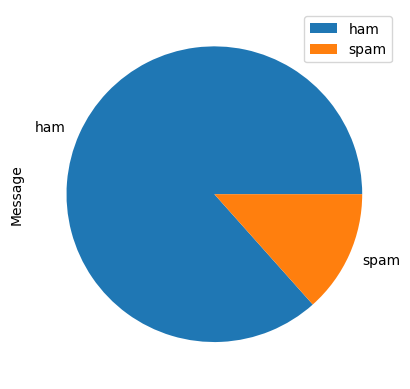

In [5]:
data.groupby('Category').count().plot(kind='pie',subplots=True)

# Preparing Data

If the text is marked as spam then it will be labeled as 1 else will be labeled as 0

In [6]:
data['spam'] = data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Spliting data for training as well as testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.Message,data.spam)

In [8]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Selecting Best Model

In [9]:
mb = MultinomialNB()
accuracy_mb = cross_val_score(mb, X_train_count,y_train, cv=3).mean()
print(accuracy_mb*100,'%')

98.08566642737496 %


In [10]:
svm = SVC()
accuracy_svm = cross_val_score(svm, X_train_count,y_train, cv=3).mean()
print(accuracy_svm*100,'%')

97.12849964106245 %


In [11]:
rfc = RandomForestClassifier()
accuracy_rfc = cross_val_score(rfc, X_train_count,y_train, cv=3).mean()
print(accuracy_rfc*100,'%')

97.2242163196937 %


In [12]:
dt = DecisionTreeClassifier()
accuracy_dt = cross_val_score(dt, X_train_count,y_train, cv=3).mean()
print(accuracy_dt*100,'%')

96.33883704235463 %


In [13]:
knn = KNeighborsClassifier()
accuracy_knn = cross_val_score(knn, X_train_count,y_train, cv=3).mean()
print(accuracy_knn*100,'%')

89.78224455611391 %


From the above procedure we can see the best performing model is MultinomialNB

# Training Model

In [14]:
final_model = MultinomialNB()

In [15]:
final_model.fit( X_train_count,y_train)

MultinomialNB()

# Testing Model

In [16]:
X_test_count = v.transform(X_test)
final_accuracy = final_model.score(X_test_count,y_test)

print(final_accuracy*100,'%')

98.63603732950466 %


Testing Model on custom data

In [17]:
def classify_mail(email):
    emails_count = v.transform([email])
    array_of_ans = final_model.predict(emails_count)
    for i in array_of_ans:
        if(i==1):
            return 'Its a Spam Mail'
        else:
            return 'Not a Spam Mail'

In [18]:
email = 'Get up to 10,000 Discount* using your SBI Card'
classify_mail(email)

'Its a Spam Mail'